In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l1_l2

from tensorflow.keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the Dataset

!gdown 1USSztWeUoeyYkdMrTXbVpJB5PobLQ8JS

Downloading...
From: https://drive.google.com/uc?id=1USSztWeUoeyYkdMrTXbVpJB5PobLQ8JS
To: /content/porter.csv
100% 23.8M/23.8M [00:00<00:00, 65.6MB/s]


In [3]:
# Reading the data

df = pd.read_csv('porter.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

In [4]:
print('The number of rows in the Dataset:', df.shape[0])
print('The number of columns in the Dataset:', df.shape[1])

The number of rows in the Dataset: 197428
The number of columns in the Dataset: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
df.describe()

market_id  order_protocol    total_items       subtotal  \
count  196441.000000   196433.000000  197428.000000  197428.000000   
mean        2.978706        2.882352       3.196391    2682.331402   
std         1.524867        1.503771       2.666546    1823.093688   
min         1.000000        1.000000       1.000000       0.000000   
25%         2.000000        1.000000       2.000000    1400.000000   
50%         3.000000        3.000000       3.000000    2200.000000   
75%         4.000000        4.000000       4.000000    3395.000000   
max         6.000000        7.000000     411.000000   27100.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       197428.000000   197428.000000   197428.000000   
mean             2.670791      686.218470     1159.588630   
std              1.630255      522.038648      558.411377   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      800.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      949.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  
count           181166.000000        181166.000000             181166.000000  
mean                44.808093            41.739747                 58.050065  
std                 34.526783            32.145733                 52.661830  
min                 -4.000000            -5.000000                 -6.000000  
25%                 17.000000            15.000000                 17.000000  
50%                 37.000000            34.000000                 41.000000  
75%                 65.000000            62.000000                 85.000000  
max                171.000000           154.000000                285.000000

In [7]:
df.describe(include = 'object').T

count  unique                               top  \
created_at              197428  180985               2015-02-11 19:50:43   
actual_delivery_time    197421  178110               2015-02-11 20:40:45   
store_id                197428    6743  d43ab110ab2489d6b9b2caa394bf920f   
store_primary_category  192668      74                          american   

                         freq  
created_at                  6  
actual_delivery_time        5  
store_id                  937  
store_primary_category  19399

In [8]:
df.isnull().sum().reset_index(name='Null Count')

index  Null Count
0                  market_id         987
1                 created_at           0
2       actual_delivery_time           7
3                   store_id           0
4     store_primary_category        4760
5             order_protocol         995
6                total_items           0
7                   subtotal           0
8         num_distinct_items           0
9             min_item_price           0
10            max_item_price           0
11    total_onshift_partners       16262
12       total_busy_partners       16262
13  total_outstanding_orders       16262

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique().reset_index(name='Unique Count')

index  Unique Count
0                  market_id             6
1                 created_at        163082
2       actual_delivery_time        160686
3                   store_id          5645
4     store_primary_category            73
5             order_protocol             7
6                total_items            54
7                   subtotal          8189
8         num_distinct_items            20
9             min_item_price          2251
10            max_item_price          2586
11    total_onshift_partners           172
12       total_busy_partners           158
13  total_outstanding_orders           281

In [12]:
#Encoding Categorical Variable

df["order_protocol"] = df.order_protocol.astype("category").cat.codes
df["store_primary_category"] = df.store_primary_category.astype("category").cat.codes
df["market_id"] = df.market_id.astype("category").cat.codes

In [13]:
# Converting to datetime

df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [14]:
# calculating delivery time taken from the columns created_at and actual_delivery_time

df['time_taken'] = df['actual_delivery_time'] - df['created_at']

# delivery time in mins

df['time_taken_mins'] = df['time_taken'].dt.total_seconds() / 60

In [15]:
# getting hour and day of the week from the column created_at

df['hour']= df['created_at'].dt.hour
df['weekday']= df['created_at'].dt.weekday

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 176248 non-null  int8           
 1   created_at                176248 non-null  datetime64[ns] 
 2   actual_delivery_time      176248 non-null  datetime64[ns] 
 3   store_id                  176248 non-null  object         
 4   store_primary_category    176248 non-null  int8           
 5   order_protocol            176248 non-null  int8           
 6   total_items               176248 non-null  int64          
 7   subtotal                  176248 non-null  int64          
 8   num_distinct_items        176248 non-null  int64          
 9   min_item_price            176248 non-null  int64          
 10  max_item_price            176248 non-null  int64          
 11  total_onshift_partners    176248 non-null  float64       

In [17]:
order_volumes = df.groupby('market_id').size()
print("Distribution of Order Volumes Across Different Markets:")
print(order_volumes)

Distribution of Order Volumes Across Different Markets:
market_id
0    37207
1    53625
2    21119
3    46359
4    17298
5      640
dtype: int64


In [18]:
df['order_hour'] = df['created_at'].dt.hour

order_frequency = df['order_hour'].value_counts().sort_index()

peak_hours = order_frequency.idxmax()
peak_order_count = order_frequency.max()
print(order_frequency)
print(f"The peak hours for order placements are between {peak_hours} and {peak_hours + 1} o'clock, with {peak_order_count} orders.")

order_hour
0     11466
1     25734
2     32940
3     23719
4     13254
5      6079
6      1223
7         9
8         2
14       39
15      504
16     1945
17     3071
18     4546
19    12214
20    14014
21    10274
22     7877
23     7338
Name: count, dtype: int64
The peak hours for order placements are between 2 and 3 o'clock, with 32940 orders.


In [19]:
df['order_day_of_week'] = df['created_at'].dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['order_day_name'] = df['order_day_of_week'].map(day_names)

order_volumes_by_day = df['order_day_name'].value_counts()
peak_days = order_volumes_by_day.idxmax()
peak_order_count = order_volumes_by_day.max()
print(order_volumes_by_day)
print(f"The day(s) with the highest order volumes is/are {peak_days}, with {peak_order_count} orders.")

order_day_name
Saturday     30858
Sunday       29898
Friday       25012
Monday       24202
Thursday     22997
Wednesday    21796
Tuesday      21485
Name: count, dtype: int64
The day(s) with the highest order volumes is/are Saturday, with 30858 orders.


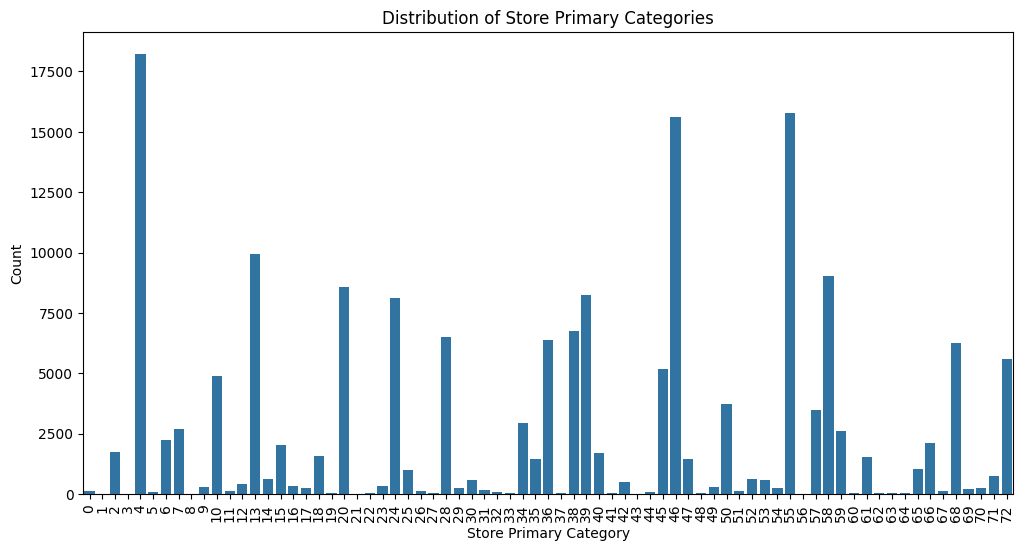

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='store_primary_category')
plt.xticks(rotation=90)
plt.xlabel('Store Primary Category')
plt.ylabel('Count')
plt.title('Distribution of Store Primary Categories')
plt.show()

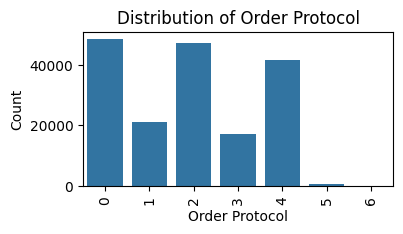

In [21]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='order_protocol')
plt.xticks(rotation=90)
plt.xlabel('Order Protocol')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

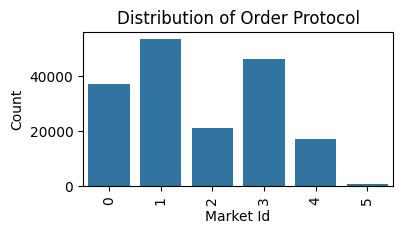

In [22]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='market_id')
plt.xticks(rotation=90)
plt.xlabel('Market Id')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

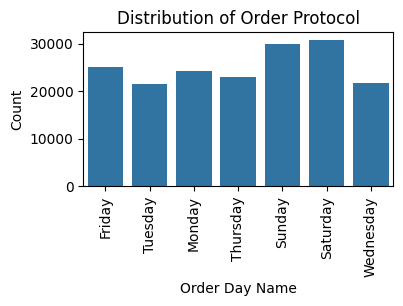

In [23]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='order_day_name')
plt.xticks(rotation=90)
plt.xlabel('Order Day Name')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

In [24]:
# Removing unnecessary columns

df.drop(['order_day_name','created_at','actual_delivery_time', 'store_id'],axis=1,inplace=True)

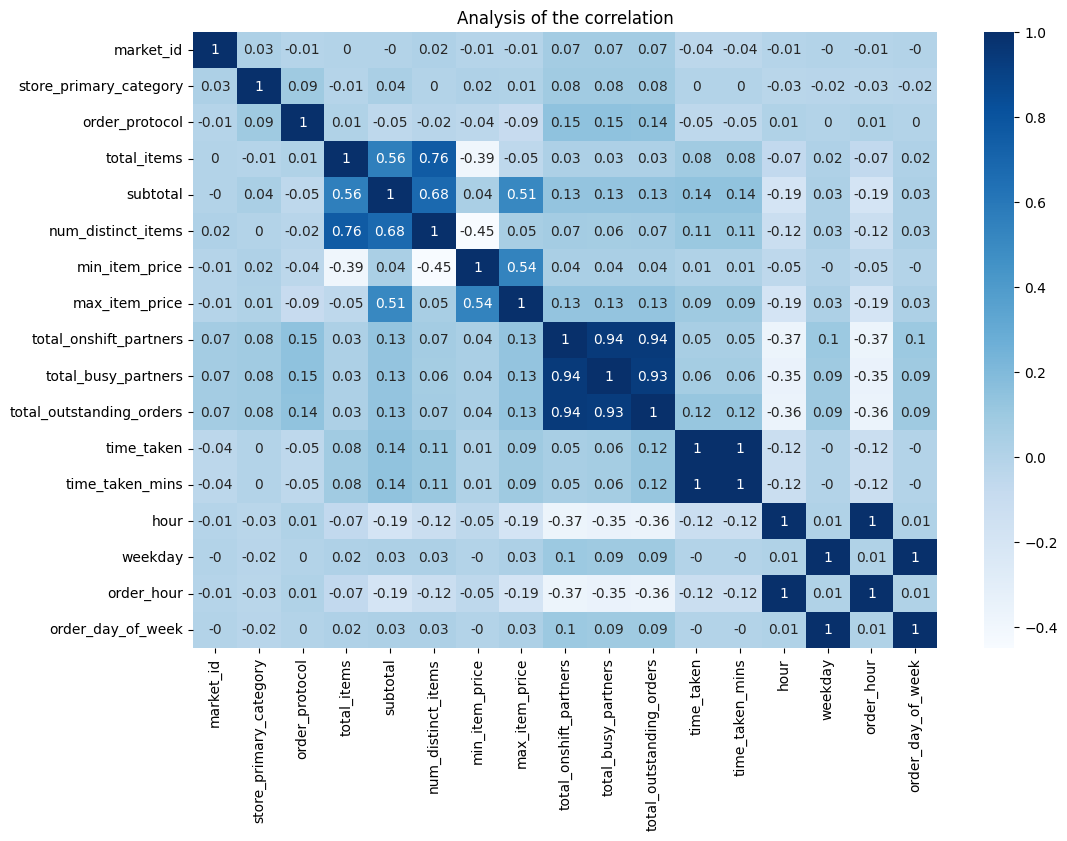

In [25]:
# Heat-map

plt.figure(figsize=(12, 8))
sns.heatmap(round(df.corr(),2), annot = True,cmap='Blues')
plt.title('Analysis of the correlation')
plt.show()

<Figure size 1200x600 with 0 Axes>

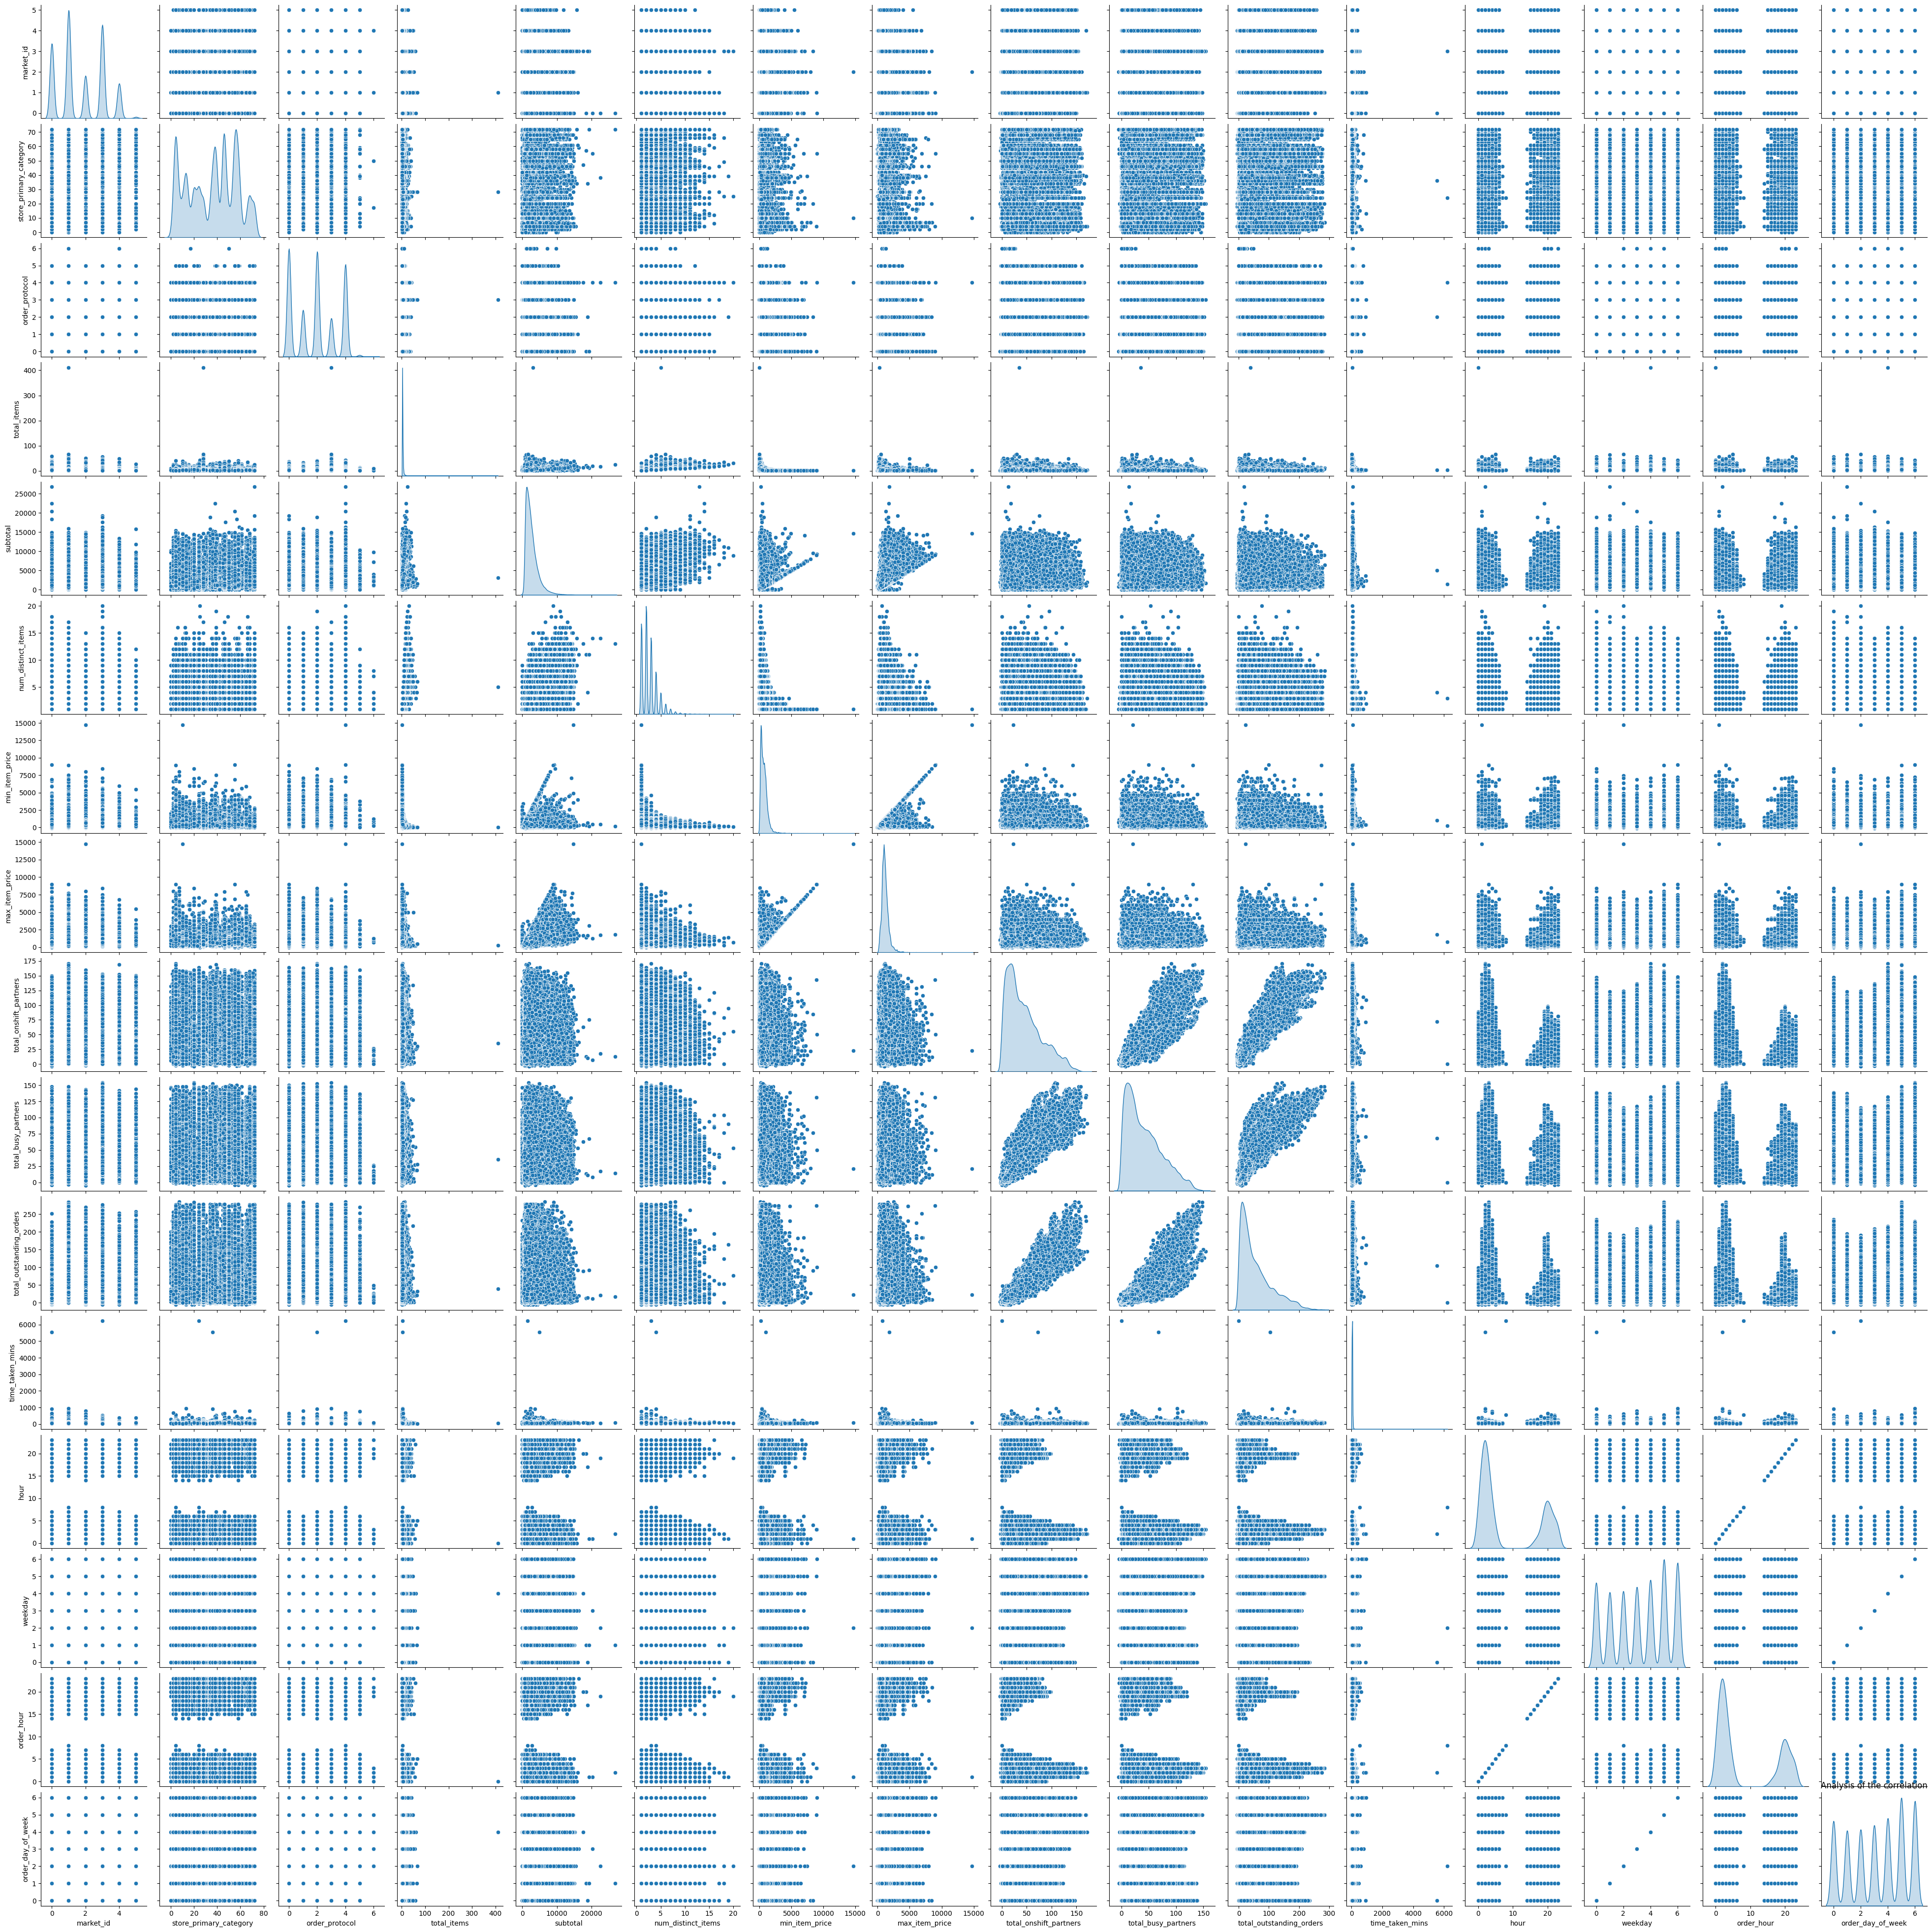

In [26]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, diag_kind="kde")
plt.title('Analysis of the correlation')
plt.show()

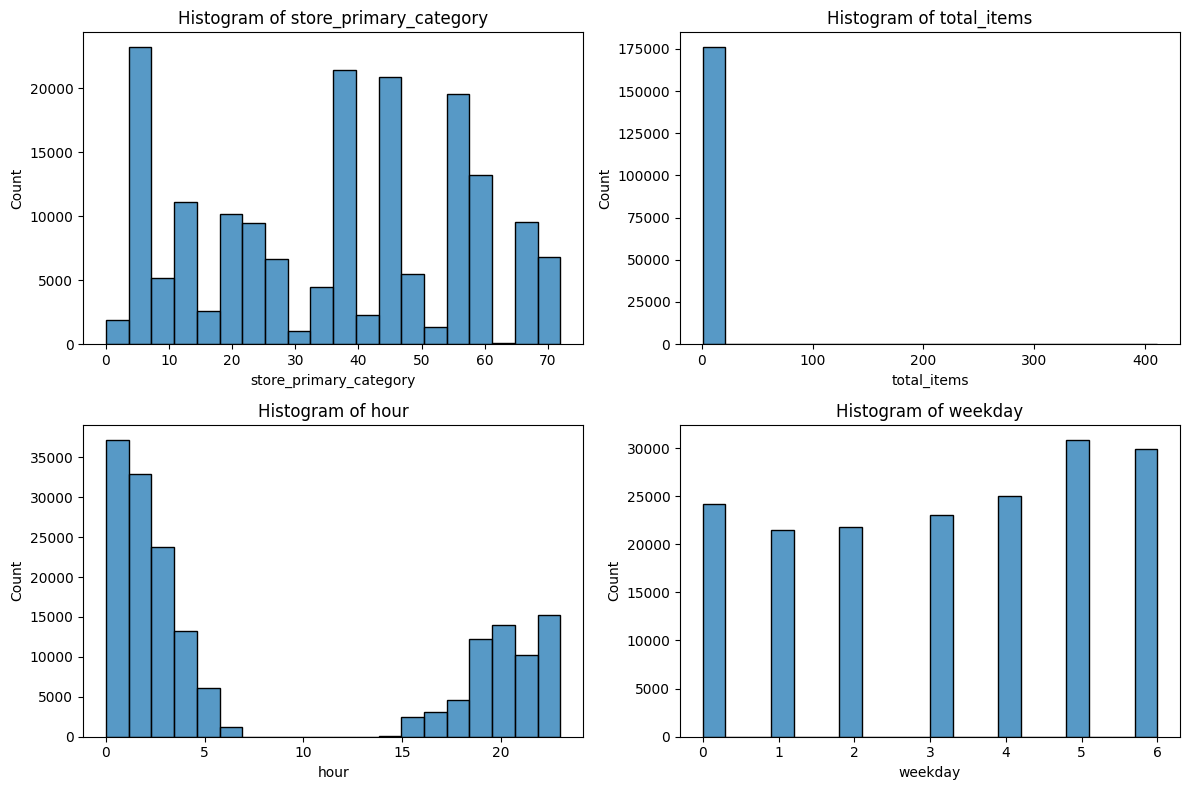

In [27]:
columns = [ 'store_primary_category','total_items', 'hour', 'weekday' ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.histplot(data=df, x=var, bins=20, ax=ax)
    ax.set_title(f'Histogram of {var}')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.show()

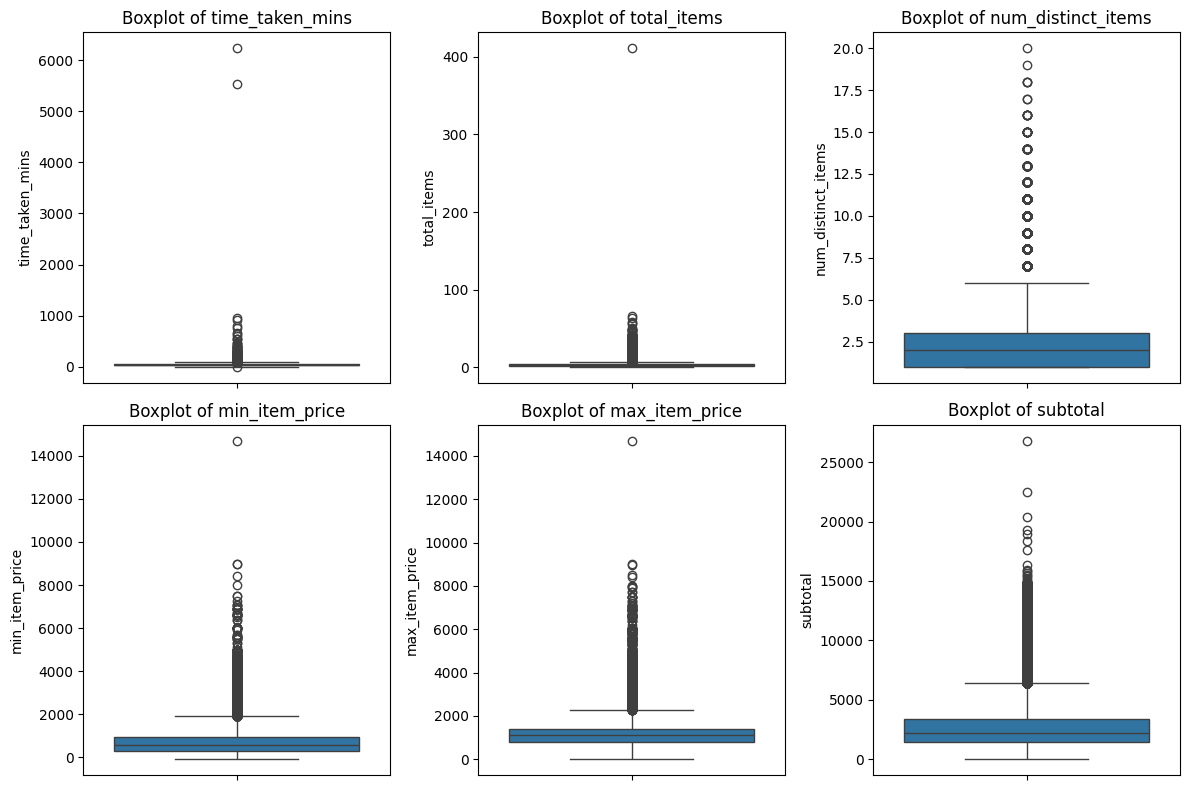

In [28]:
# Outlier check using Boxplot

columns= ['time_taken_mins', 'total_items', 'num_distinct_items','min_item_price', 'max_item_price', 'subtotal']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

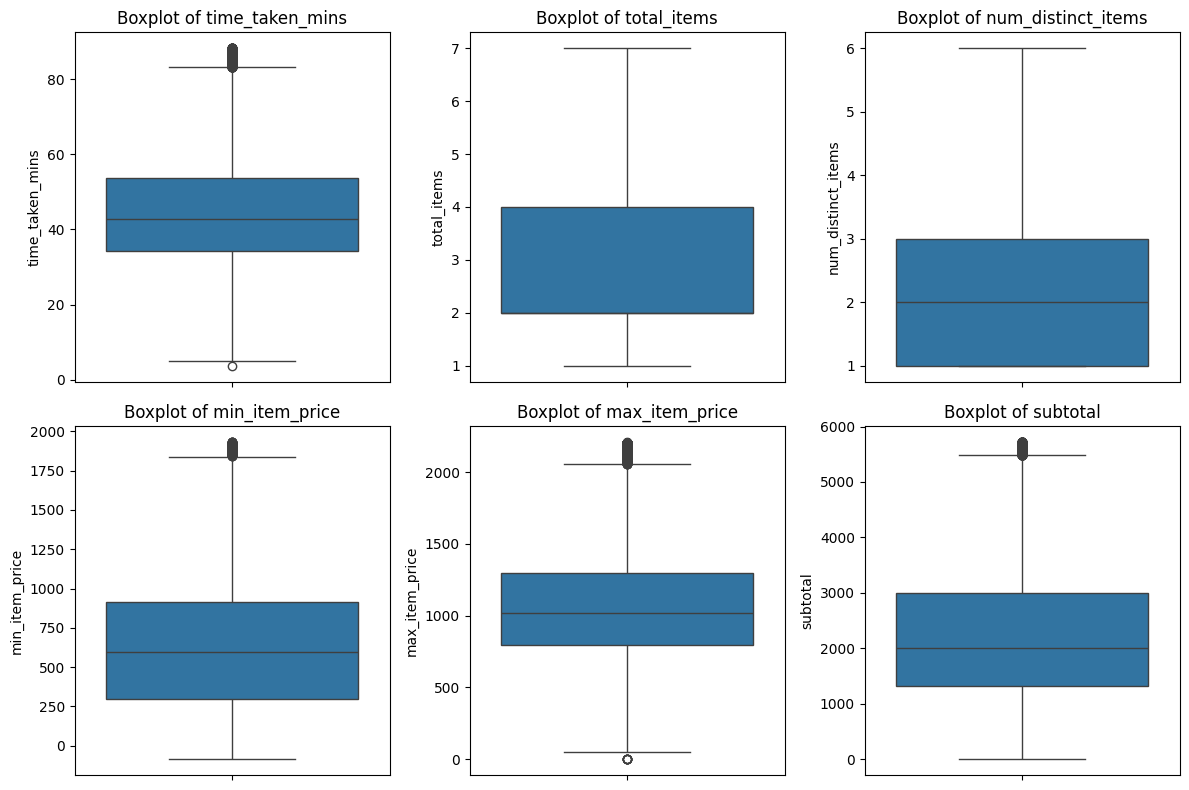

In [29]:
# removing outliers using IQR

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Now plot the boxplots for the filtered data

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

In [30]:
df['time_taken_mins'] = df['time_taken'].dt.total_seconds() / 60  # Convert to minutes

# Now proceed with splitting the data
y = df['time_taken_mins']
X = df.drop(['time_taken_mins', 'time_taken'], axis=1)  # Drop both original and converted timedelta columns

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of x_train: {x_train.shape}, shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}, shape of y_test: {y_test.shape}" )

Shape of x_train: (119376, 15), shape of y_train: (119376,)
Shape of x_test: (29845, 15), shape of y_test: (29845,)


In [31]:
#Random Forest

reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
y_hat = reg.predict(x_test)
mse = mean_squared_error(y_test,y_hat)
rmse=mse**0.5
mae = mean_absolute_error(y_test,y_hat)
rf_r2_score=r2_score(y_test,y_hat)

print(f"Mean Squared Error: {mse}")
print(f"Relative Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r2_score: {rf_r2_score}")

Mean Squared Error: 159.40151778290985
Relative Mean Squared Error: 12.625431389972773
Mean Absolute Error: 9.976622095137046
r2_score: 0.24748314533361482


In [33]:
def mape(y_actual, y_predict):
    mape = np.mean(np.abs((y_actual-y_predict)/y_actual))
    return mape
print(f"Mean Absolute Percentage Error is: {mape(y_test,y_hat)}")

Mean Absolute Percentage Error is: 0.24856569963255581


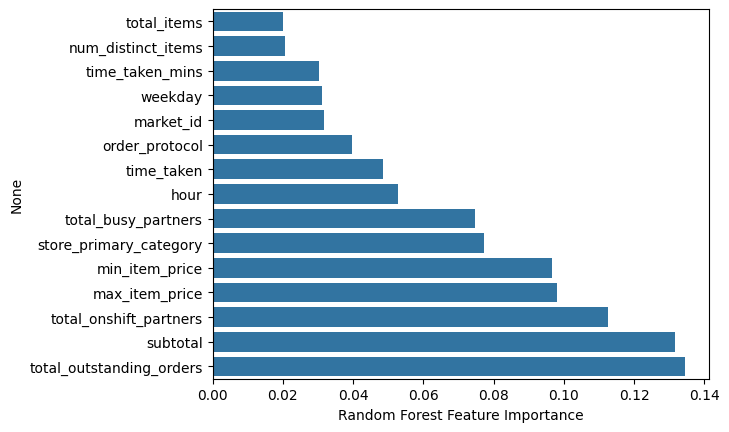

In [34]:
sort_idx=reg.feature_importances_.argsort()
sns.barplot(y=df.columns[sort_idx], x=reg.feature_importances_[sort_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [35]:
#Scaling the data for neural networks.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [36]:
model = Sequential(
    [
        Dense(64, activation='relu', kernel_initializer='normal', input_shape=(x_train.shape[1],)),
        Dense(516, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='linear')
    ]
)

In [37]:
scaler= StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.32196587, -1.5287029 , -1.27128474, ..., -0.10723221,
        -0.44267026, -0.10723221],
       [ 1.68686643, -0.38031668,  0.70376552, ..., -1.58785279,
        -0.44267026, -1.58785279],
       [ 0.18245028, -0.38031668,  0.70376552, ..., -1.58785279,
         1.26769744, -1.58785279],
       ...,
       [-1.32196587,  0.09817758,  0.04541543, ...,  1.37338837,
        -0.67071928,  1.37338837],
       [-1.32196587,  0.14602701,  1.36211561, ..., -0.6007724 ,
        -0.89876831, -0.6007724 ],
       [-1.32196587, -1.24160634, -1.27128474, ...,  1.37338837,
        -0.67071928,  1.37338837]])

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#  Make predictions
y_pred = model.predict(x_test)

# : Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Optionally: Feature importance
importances = model.feature_importances_
print(f"Feature Importances: {importances}")

Mean Squared Error: 159.5354939046916
Mean Absolute Error: 9.982198535794728
Feature Importances: [0.03199366 0.077471   0.03957832 0.02027724 0.13197254 0.02054094
 0.09669696 0.09801496 0.11183351 0.07439513 0.13324012 0.04929662
 0.03028435 0.05276453 0.03164014]


In [39]:
r2_score(y_test, y_pred)

0.24685065894850444

In [40]:
# base NN regression model

# initialize the model
model = Sequential()

# add the layers and neurons
model.add(Dense(256, input_dim=15, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1))

# compile the model
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])


In [41]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 516.6312 - mae: 16.9434 - mape: 39.7711 - mse: 516.6312 - val_loss: 172.9001 - val_mae: 10.5099 - val_mape: 26.6716 - val_mse: 172.9001
Epoch 2/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 175.9417 - mae: 10.5234 - mape: 26.3312 - mse: 175.9417 - val_loss: 174.1742 - val_mae: 10.6897 - val_mape: 27.8710 - val_mse: 174.1742
Epoch 3/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 173.2886 - mae: 10.4467 - mape: 26.0262 - mse: 173.2886 - val_loss: 168.6568 - val_mae: 10.2498 - val_mape: 25.3095 - val_mse: 168.6568
Epoch 4/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 170.2971 - mae: 10.3535 - mape: 25.7640 - mse: 170.2971 - val_loss: 168.8979 - val_mae: 10.2221 - val_mape: 25.0193 - val_mse: 168.8979
Epoch 5/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 171.0234 - mae: 10.3412 - mape: 25.7343 - mse: 171.0234 - val_loss: 166.9053 - val_mae: 10.1913 - val_mape: 25.1690 - val_mse: 166.9053
Epoch 6/20
747/747 ━

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,941 (531.02 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,628 (354.02 KB)

In [43]:
# predict on test data

y_pred= model.predict(x_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [44]:
# checking the r2_score of the regression model

r2_score(y_test, y_pred)

0.23833024675117065

In [116]:
# Evaluate the model on the test set
test_loss, test_mse, test_mae, test_mape = model.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mae: nan - mape: nan - mse: nan
Test MSE: nan
Test MAE: nan
Test MAPE: nan


In [47]:
# code to hypermeterize the model

# Function to create the model
def create_model(neurons=32, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=15, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mape'])
    return model

# Hyperparameter grid
neurons_grid = [32, 64, 128]
learning_rate_grid = [0.001, 0.01, 0.1]
batch_size_grid = [32, 64, 128]
epochs_grid = [10, 20, 30]


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_mse = float('inf')
best_params = {}

# Manual grid search
for neurons in neurons_grid:
    for learning_rate in learning_rate_grid:
        for batch_size in batch_size_grid:
            for epochs in epochs_grid:
                # Create and train the model
                model = create_model(neurons=neurons, learning_rate=learning_rate)
                model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                y_pred = model.predict(x_test)
                mse = mean_squared_error(y_test, y_pred)

                # If this model is better, store the parameters and score
                if mse < best_mse:
                    best_mse = mse
                    best_params = {
                        'neurons': neurons,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

# Print the best parameters and the corresponding score
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")


Best parameters: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}
Best MSE: 170.02214989053286


In [48]:
# training the model based on best parameters

# Define the best hyperparameters
neurons = 128
learning_rate = 0.001
batch_size = 64
epochs = 50


# Function to create and compile the model
def create_model():
    model2 = Sequential()
    model2.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))
    model2.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))
    model2.add(Dense(64, activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)) )

    model2.add(Dense(1))

    checkpoint = tf.keras.callbacks.ModelCheckpoint("CNN_best.keras", save_best_only = True)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, restore_best_weights = True )

    optimizer = Adam(learning_rate=learning_rate) # initializing the optimizer

    model2.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape']) # compiling the model
    return model2

# Create the model
model2 = create_model()

In [49]:
# Train the model on best hyperparameters

history = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)


Epoch 1/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 481.2504 - mae: 15.9556 - mape: 37.5652 - mse: 481.0816 - val_loss: 581.4698 - val_mae: 19.4652 - val_mape: 39.3896 - val_mse: 581.3103
Epoch 2/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 260.5787 - mae: 12.6132 - mape: 29.9968 - mse: 260.4174 - val_loss: 229.2651 - val_mae: 12.0791 - val_mape: 30.1010 - val_mse: 229.1002
Epoch 3/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 228.0789 - mae: 11.8436 - mape: 28.4616 - mse: 227.9131 - val_loss: 224.7353 - val_mae: 12.1065 - val_mape: 31.1781 - val_mse: 224.5665
Epoch 4/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 216.7077 - mae: 11.5598 - mape: 27.9182 - mse: 216.5382 - val_loss: 217.5414 - val_mae: 11.9537 - val_mape: 31.0178 - val_mse: 217.3693
Epoch 5/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 202.5727 - mae: 11.1758 - mape: 27.0908 - mse: 202.4003 - val_loss: 216.1274 - val_mae: 11.1699 - val_mape: 24.6787 - val_mse: 215.9545
Epoch 6/5

In [50]:
# Make predictions
y_pred = model2.predict(x_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [51]:
# Evaluate the model on the test set
test_loss, test_mse, test_mae, test_mape = model2.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 169.5181 - mae: 10.1129 - mape: 24.1102 - mse: 169.4605
Test MSE: 170.7912
Test MAE: 10.1471
Test MAPE: 24.1899
